# Figure 1. Manhattan plots for rare-variant aggregate analysis

# Discovery sample

In [ ]:
library('dplyr')
library('ggrepel')
plots <- function(file,bins,out){
data <- read.table(gzfile(file),sep='\t', header=T)
# Create a subset of the data with variants with P< 0.05 and arrange by chromosome number
# https://danielroelfs.com/blog/how-i-create-manhattan-plots-using-ggplot/
data$SNP<-unlist(lapply(data$SNP,function(x){unlist(strsplit(as.character(x),"\\."))[1]}))
sig.dat <- data %>% 
  subset(P < 0.05) %>%
  arrange (CHR, .by_group=TRUE)
# Add highlight and annotation information
sig.dat <- sig.dat %>%
mutate(is_highlight=ifelse(P<=2.5E-6, "yes", "no")) %>%
mutate(is_annotate=ifelse(P<=2.5E-6, "yes", "no"))

# Check the list of chromosomes (make sure the sex chr are at the end of the list)
# Get the cumulative base pair position for each variant
nCHR <- length(unique(sig.dat$CHR))
sig.dat$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(sig.dat$CHR)){
  nbp[i] <- max(sig.dat[sig.dat$CHR == i,]$POS)
  sig.dat[sig.dat$CHR == i,"BPcum"] <- sig.dat[sig.dat$CHR == i,"POS"] + s
  s <- s + nbp[i]
}

# Calculate the mid point for each chromosome for plotting the x-axis
# Calculate the y-lim 

axis.set <- sig.dat %>% 
  group_by(CHR) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)
ylim <- 18
sig <- 2.5E-6
# Now time to draw the manhattan plot without filtering the most significant signals
manhplot <- ggplot(sig.dat, aes(x = BPcum, y = -log10(P ), 
                             color = as.factor(CHR), size = -log10(P))) +
  geom_point(alpha = 0.75) +
  geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") + 
  scale_x_continuous(label = axis.set$CHR, breaks = axis.set$center) +
  scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +
  scale_color_manual(values = c("#FFC20A","#D41159","#39A2FA","#1AFF1A","#4B0092",
                                "#994F00","#006CD1","#D35FB7","#E1BE6A","#40B0A6",
                                "#003AB5","#DC3220","#E66100","#5D3A9B","#1A85FF",
                                "#24E1A4","#E43034","#FFB000","#80BBA2","#E799D6",
                                "#5D5A10","#980EA0")) +
  scale_size_continuous(range = c(0.5,3)) +
  # Add highlighted points and annotation
  # geom_point(data=subset(sig.dat, is_highlight=="yes"), color="orange", alpha=0.75) +
  geom_label_repel(data=subset(sig.dat, is_annotate=="yes"), aes(label=SNP), size=4,fontface = "italic") +
  labs(x = "Chromosome", 
       y = "-log10(p)") + 
  theme_classic() +
  theme( 
    legend.position = "none",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5)
  )
png(out, width = 6, height = 2, unit='in', res=300)
print(manhplot)
dev.off()
}

## H-aid

### Panel A top: pLoF - 0.01

In [8]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_78848ind_150K_f3393.regenie_burden.Mask1.0.01.remove_sin.snp_stats.gz"
bins <- "Mask1.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask1.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask1.0.01.png (132.5 KiB):

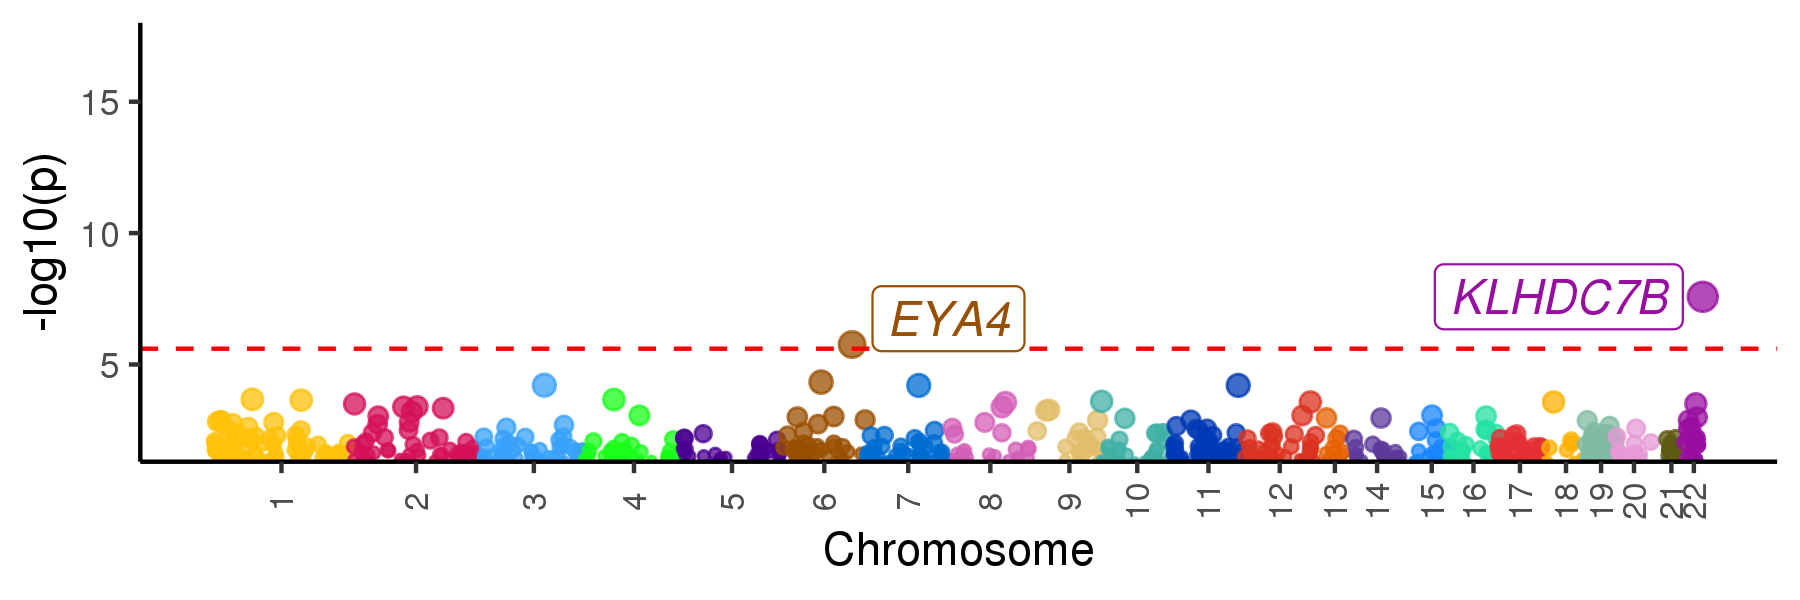

In [1]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask1.0.01.png -n

### Panel A bottom: pLoF + missense - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/091321_f3393_hearing_aid/090321_UKBB_Hearing_aid_f3393_expandedwhite_78848ind_150K_f3393.regenie_burden.Mask2.0.01.remove_sin.snp_stats.gz"
bins <- "Mask2.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask2.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask2.0.01.png (129.5 KiB):

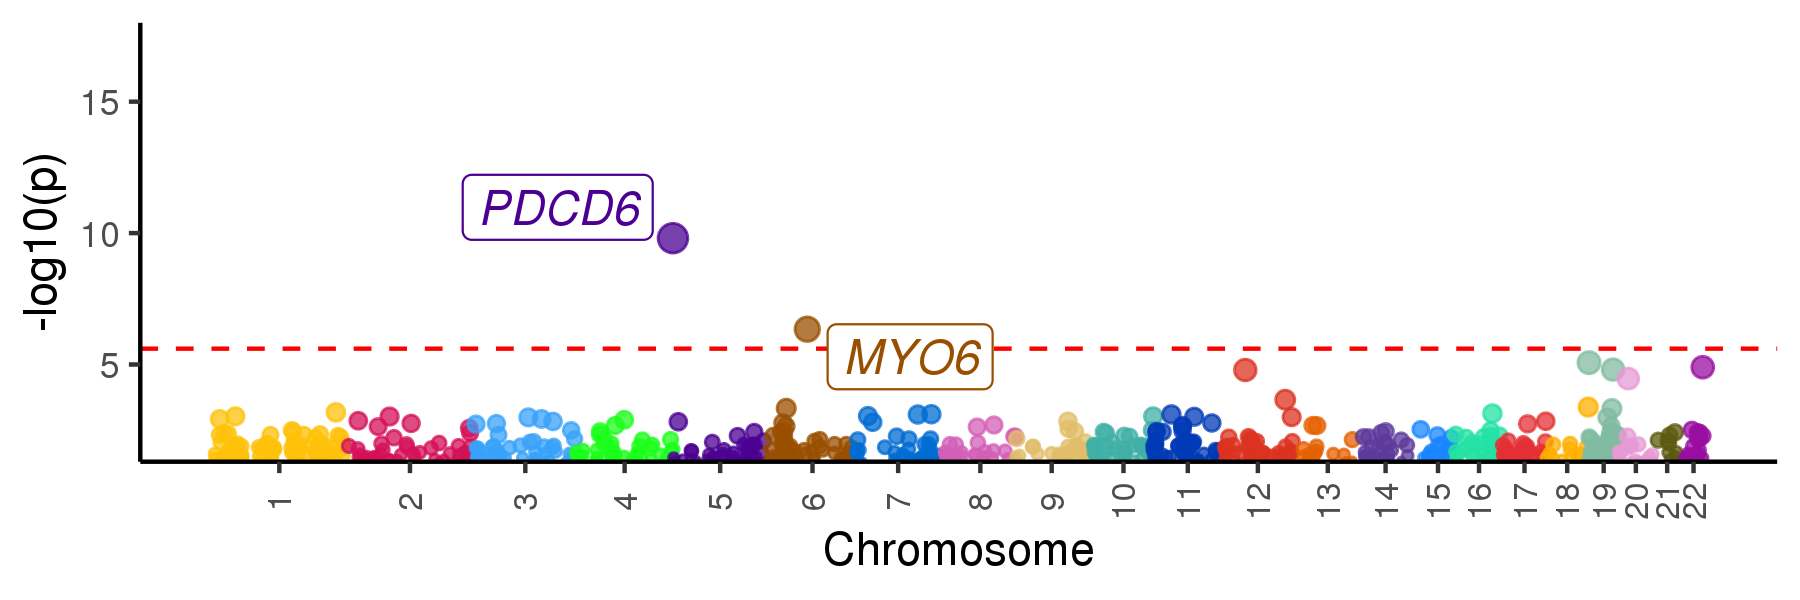

In [2]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f3393.regenie_burden.Mask2.0.01.png -n

## H-diff

### Panel B top: pLoF - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_107507ind_150K_f2247.regenie_burden.Mask2.0.01.remove_sin.snp_stats.gz"
bins <- "Mask2.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask2.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask2.0.01.png (125.6 KiB):

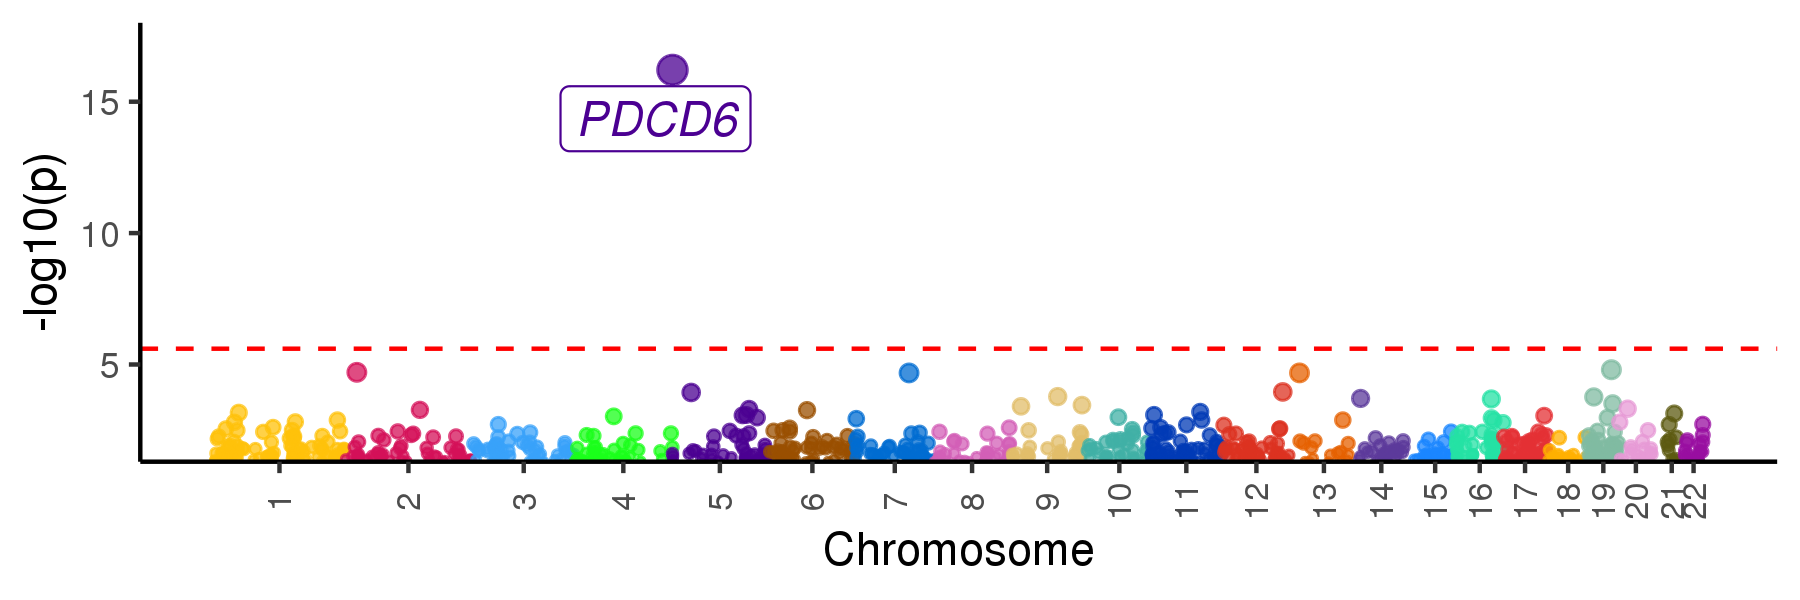

In [4]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask2.0.01.png -n

### Panel B bottom: pLoF + missense - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2247_hearing_difficulty/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_107507ind_150K_f2247.regenie_burden.Mask1.0.01.remove_sin.snp_stats.gz"
bins <- "Mask1.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask1.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask1.0.01.png (130.1 KiB):

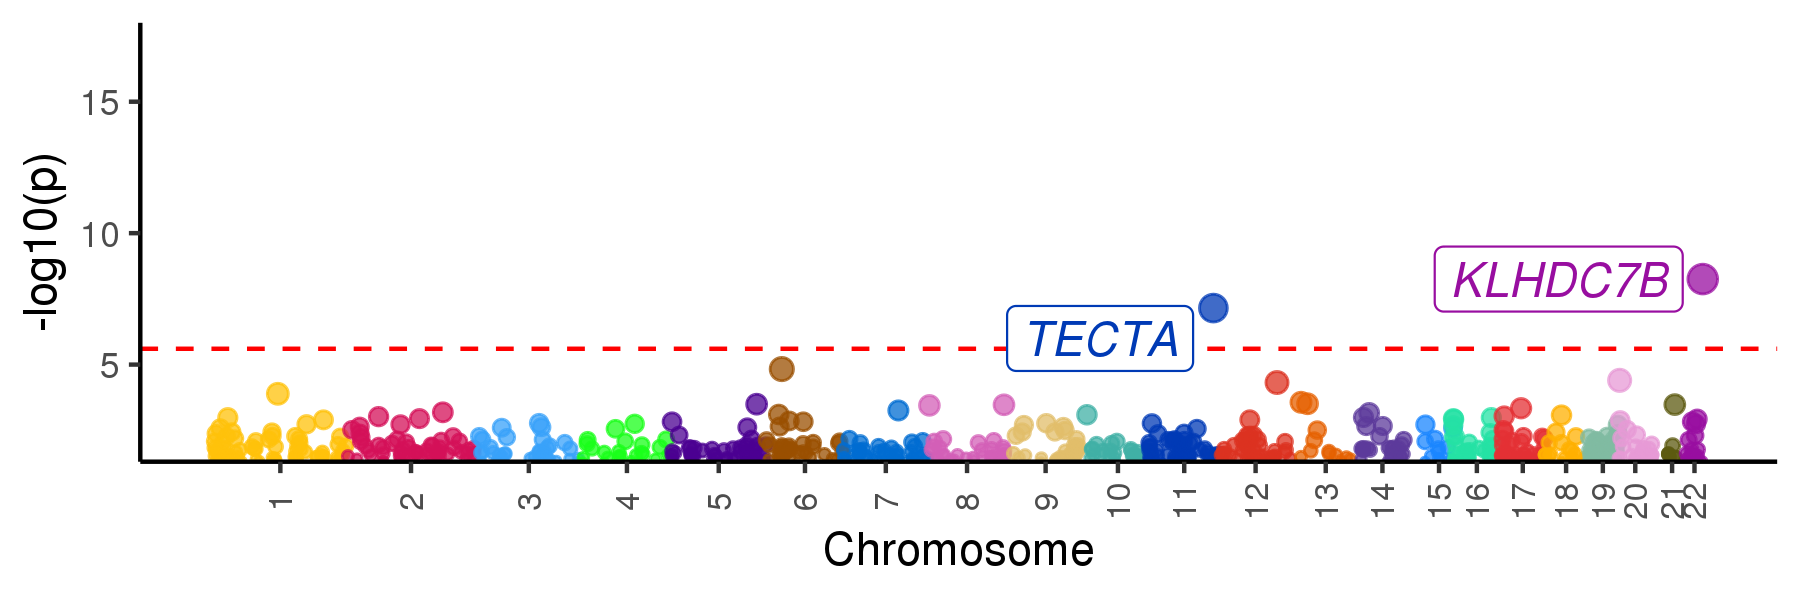

In [5]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247.regenie_burden.Mask1.0.01.png -n

## H-noise

### Panel C top: pLoF - 0.01

In [7]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_123538ind_150K_f2257.regenie_burden.Mask1.0.01.remove_sin.snp_stats.gz"
bins <- "Mask1.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask1.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask1.0.01.png (124.0 KiB):

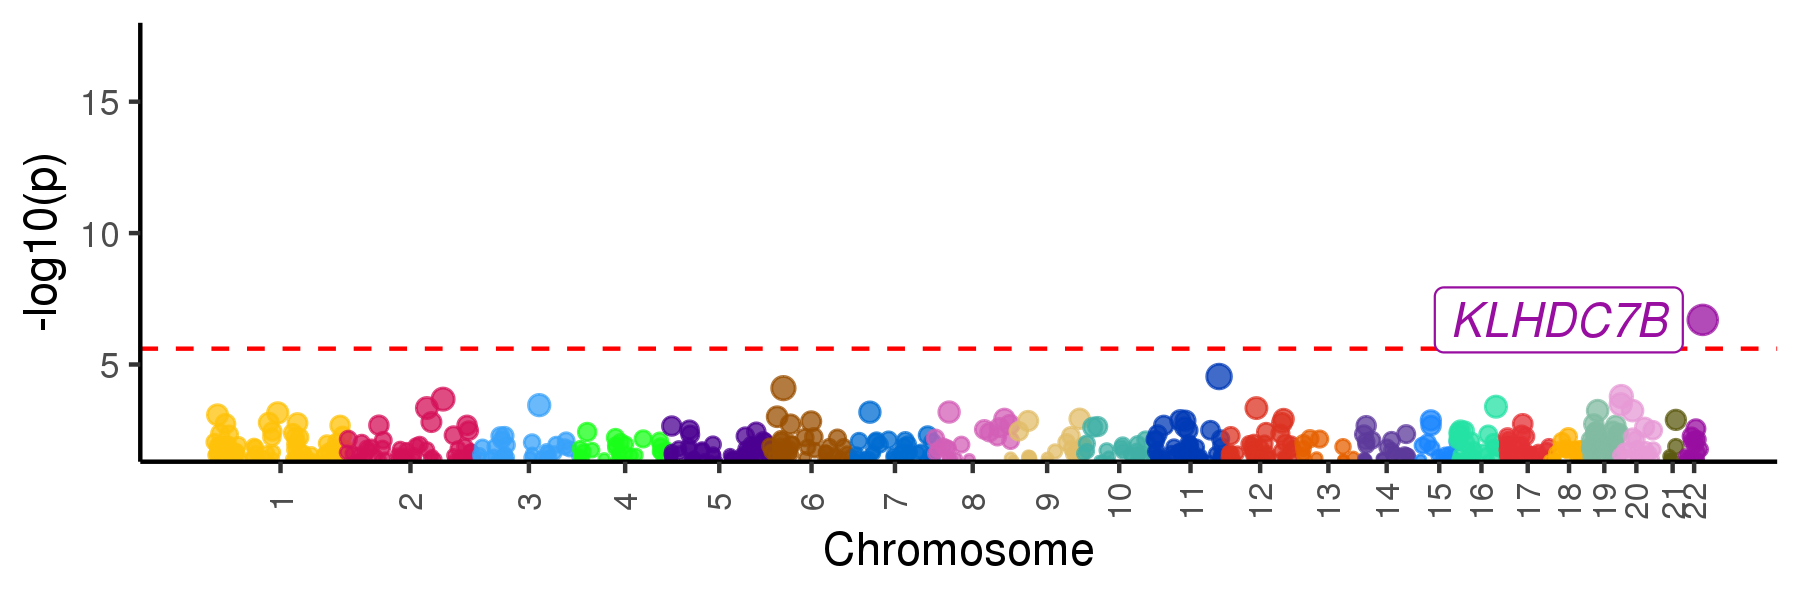

In [6]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask1.0.01.png -n

### Panel C bottom :pLoF + missense - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_f2257_hearing_noise/090321_UKBB_Hearing_noise_f2257_expandedwhite_123538ind_150K_f2257.regenie_burden.Mask2.0.01.remove_sin.snp_stats.gz"
bins <- "Mask2.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask2.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask2.0.01.png (121.7 KiB):

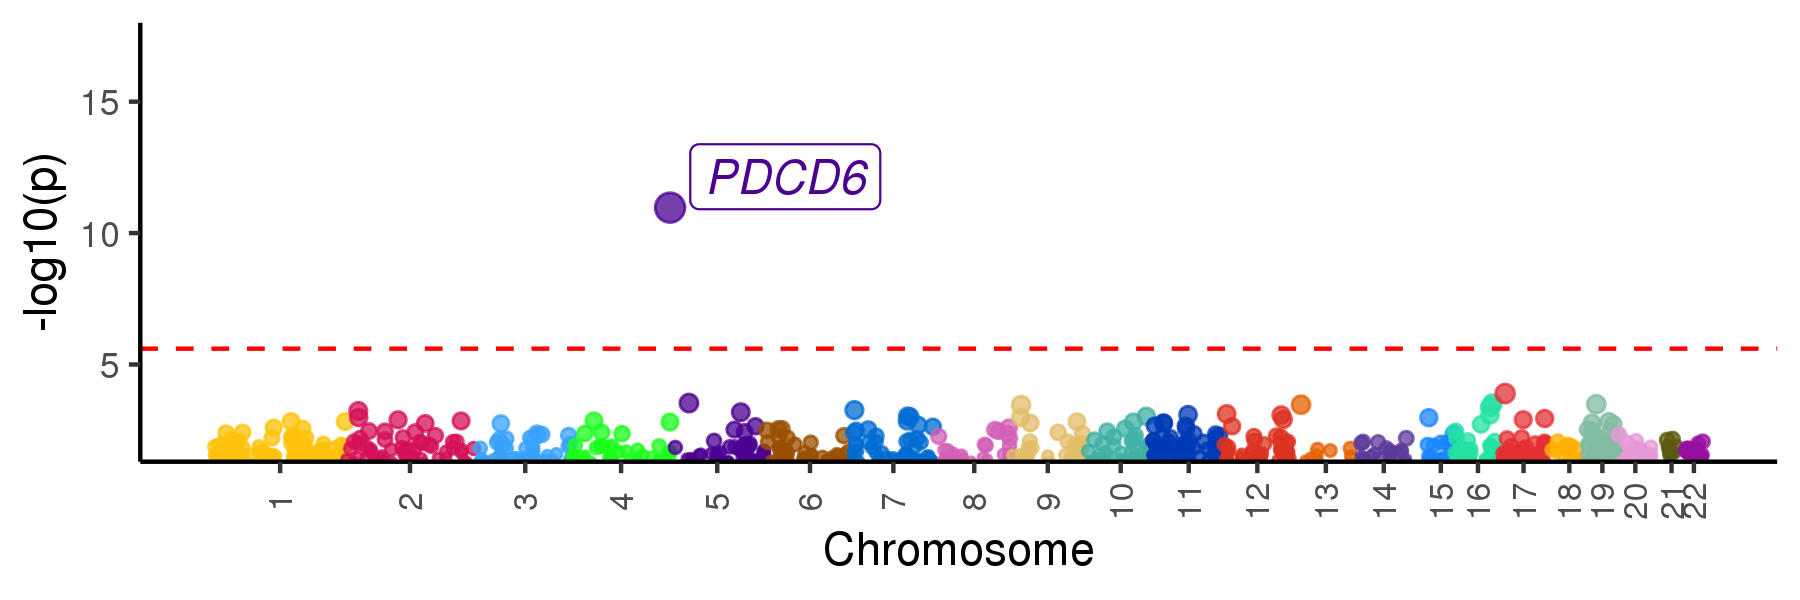

In [7]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2257.regenie_burden.Mask2.0.01.png -n

## H-both

### Panel D top: pLoF - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_102133ind_150K_f2247_f2257.regenie_burden.Mask1.0.01.remove_sin.snp_stats.gz"
bins <- "Mask1.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask1.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask1.0.01.png (134.9 KiB):

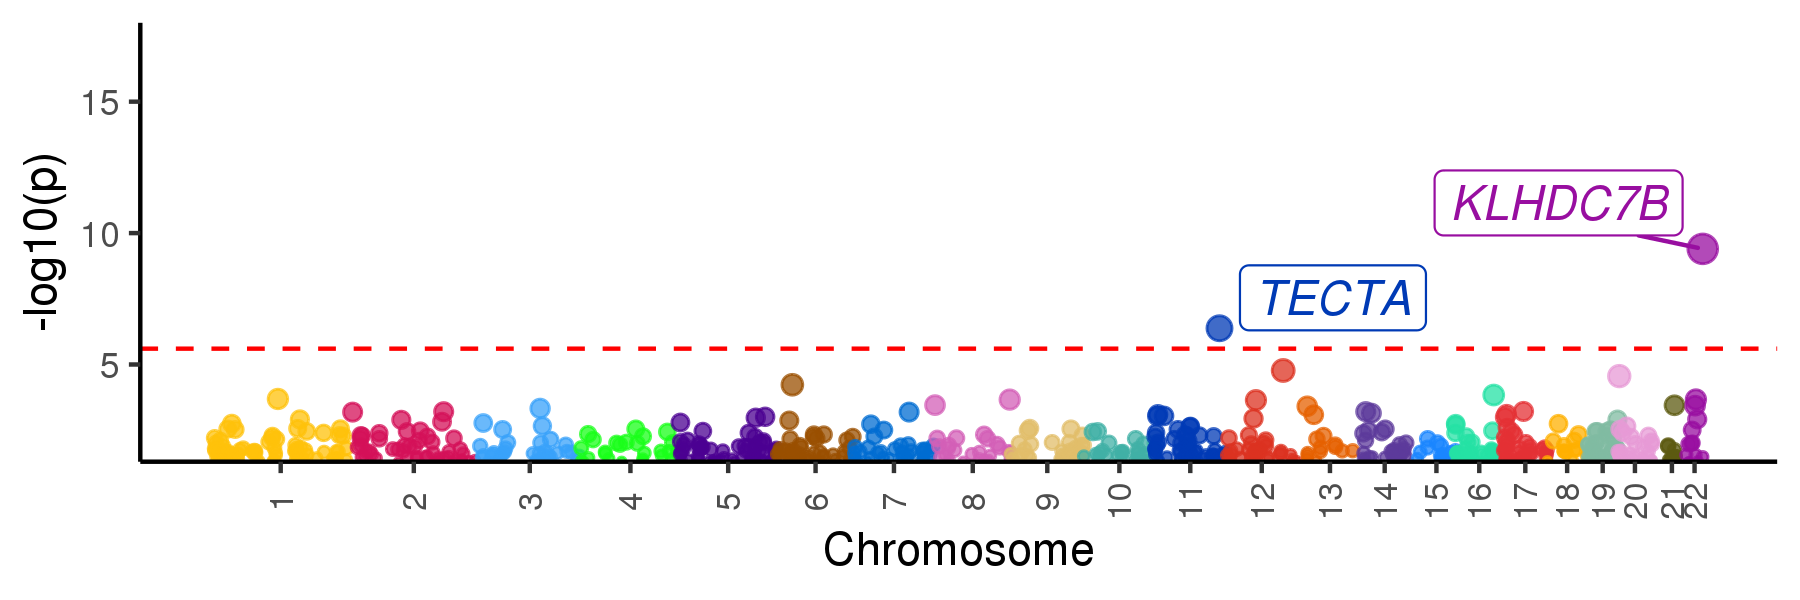

In [8]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask1.0.01.png -n

### Panel D bottom: pLoF + missense - 0.01

In [ ]:
file <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/150k/090321_Combined_f2247_f2257/090321_UKBB_Combined_f2247_f2257_expandedwhite_102133ind_150K_f2247_f2257.regenie_burden.Mask2.0.01.remove_sin.snp_stats.gz"
bins <- "Mask2.0.01"
out <- "~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask2.0.01.png"
plots(file,bins,out)

> /home/dmc2245/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask2.0.01.png (120.5 KiB):

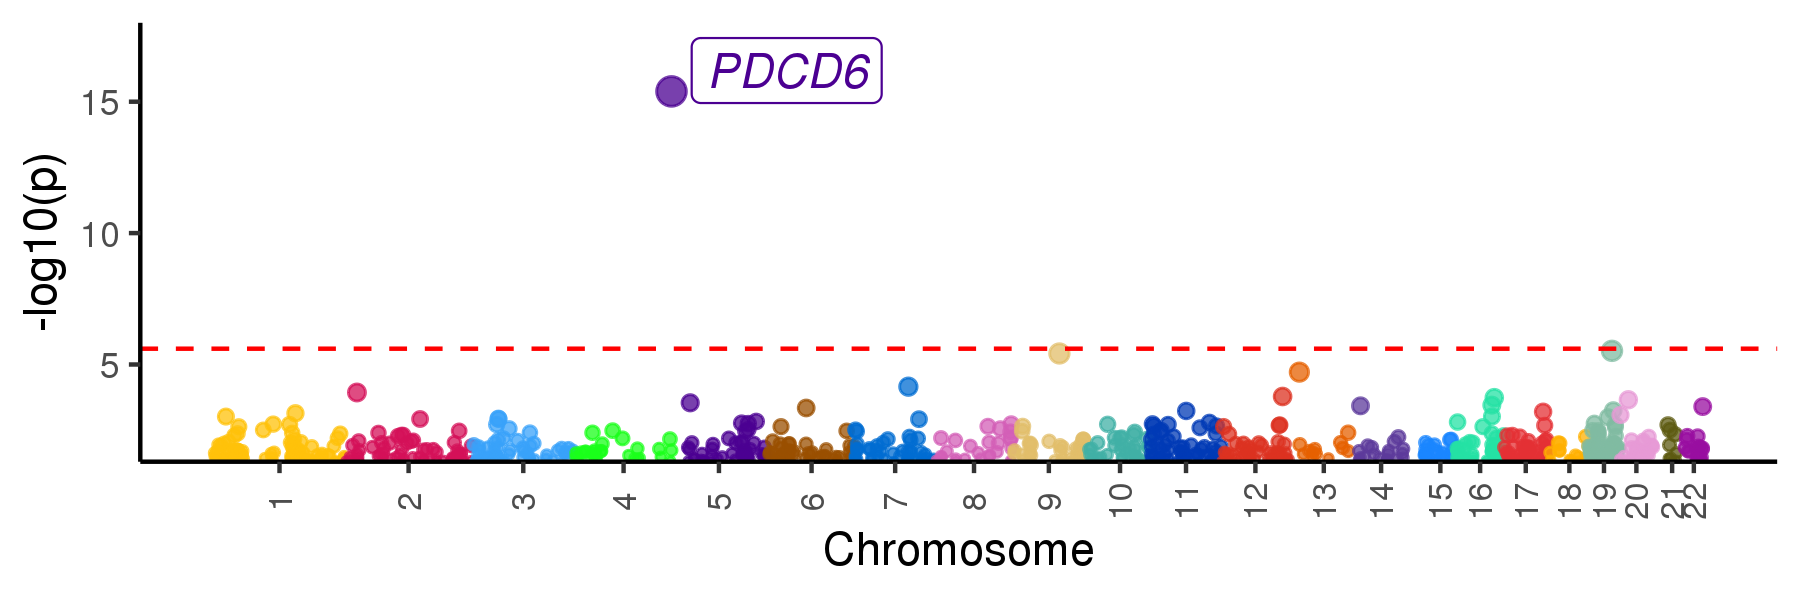

In [9]:
%preview ~/UKBiobank/results/REGENIE_results/results_burden_exome/040822_paper_manhattan/150K_f2247_f2257.regenie_burden.Mask2.0.01.png -n